# Creating final data for crop and fertilility recommendation system

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [20]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [21]:
del merge_fert['Unnamed: 0']

In [22]:
merge_fert.describe()

,N,P,K,pH
count,418.000000,418.000000,418.000000,418.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.523277,31.922068,50.570325,0.587768
min,20.000000,10.000000,10.000000,3.820000
25%,20.000000,20.000000,20.000000,5.320000
50%,30.000000,40.000000,30.000000,5.480000
75%,80.000000,60.000000,50.000000,5.620000
max,120.000000,125.000000,200.000000,6.680000


In [23]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

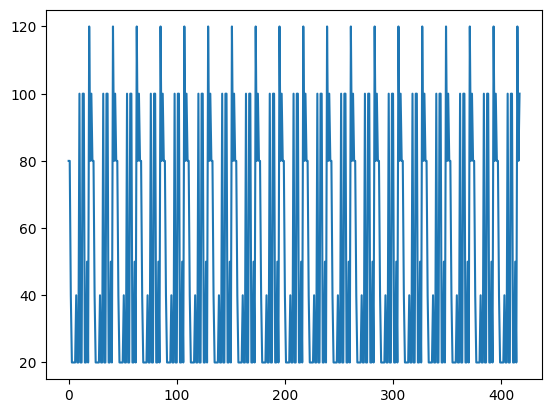

In [24]:
plt.plot(merge_fert["N"])

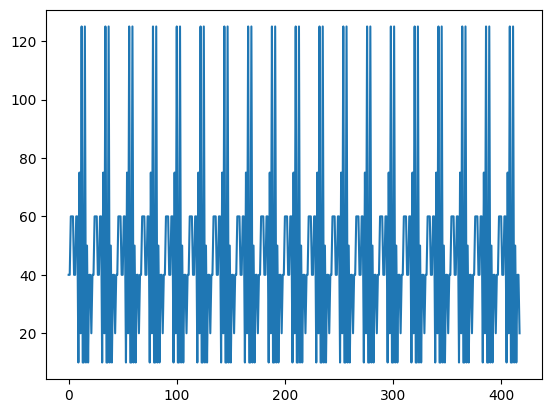

In [25]:
plt.plot(merge_fert["P"])

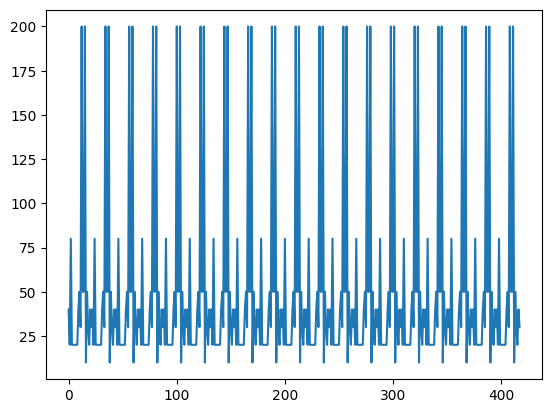

In [26]:
plt.plot(merge_fert["K"])

In [27]:
# sns.heatmap(merge_fert.corr(),annot=True)

In [28]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [34]:

import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    temp = temp.append(d,ignore_index = True)

IndexError: single positional indexer is out-of-bounds

In [ ]:
temp

,N,P,K


In [ ]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [ ]:
merge_crop

: 

In [ ]:
del merge_crop['Unnamed: 0']

: 

In [ ]:
merge_crop

: 

In [ ]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

: 

In [ ]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

: 

In [ ]:
df.head()

: 

In [ ]:
df.shape

: 

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset (replace "your_dataset.csv" with the actual file path)
dataset = pd.read_csv("../Data-processed/crop_recommendation.csv")

# Define features (X) and target variable (y)
X = dataset.drop(columns=['label'])  # Adjust 'target_column' with your actual target variable column name
y = dataset['label']

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(xgb_model, "xgb1.joblib.dat")

# Save the label encoder
joblib.dump(label_encoder, "label_encoder.joblib.dat")


['label_encoder.joblib.dat']